<a href="https://colab.research.google.com/github/IconOfDreamers99/IIITH-AIML/blob/main/AIML_Effect_of_padding%2C_kernel_size_and_stride_Pooling_Transfer_learning_and_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The following topics will be covered in this lab:
1. Effect of padding, kernel size and stride
2. Pooling
3. Transfer learning and fine-tuning

## 1. Effect of padding, kernel size and stride
We will directly use convolution layer in the **Pytorch** framework. Refer [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) for more information about additional parameters.

In [1]:
# Import pytorch packages
import torch
from torch.nn import Conv2d
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   4983      0 --:--:-- --:--:-- --:--:-- 2749k


##### Convolution in pytorch

We will define a helper function to create an square vertical edge filter of given size

In [3]:
def generate_filter(k=3):
  kernel = np.ones((k, k))
  mid_index = k // 2
  kernel[:, mid_index].fill(0)
  kernel[:, mid_index+1:] *= -1
  return kernel

We will create a helper function that takes one of the kernel elements, create a Convolution layer using pytorch and return the output image

In [4]:
def apply_conv(image, kernel_size, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  # Convert image to tensor from numpy
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  # Create a nxn kernel
  kernel = generate_filter(kernel_size)

  # Create a tensor from the numpy array
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER--------
  #1 input image channel, 1 output channels, nxn square convolution with padding on all 4 sides
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input / 255.)  # Getting input from 0 to 1
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

##### Effect of Padding
Change the padding value with the slider. What do you observe?

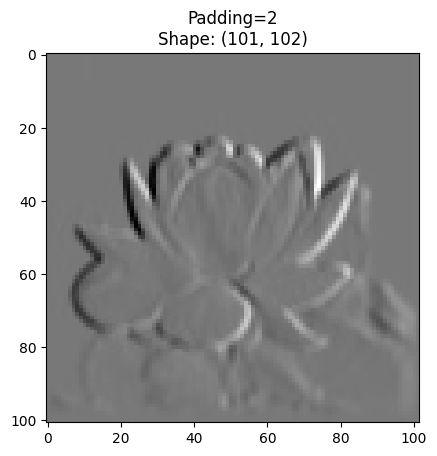

In [5]:
#@title Effect of padding { run: "auto", vertical-output: true, display-mode: "both" }

# Note:After running this cell manually, it will auto-run if you
# change the selected value.

# Our original lotus image
image = cv2.imread('lotus.jpg', 0)


# Apply 3x3 convolution to image with given padding 1 on all 4 sides
padding = 2 #@param {type:"slider", min:1, max:20, step:1}
n = apply_conv(image, 3, padding=padding)

# Plot the results
plt.imshow(n, cmap='gray')
plt.title('Padding={}\nShape: {}'.format(padding, str(n.shape)))
plt.show()

As you observed, the output shape changes with padding. More the padding, bigger will be the image.

##### Effect of Kernel size
Change the kernel size with the slider. What do you observe?

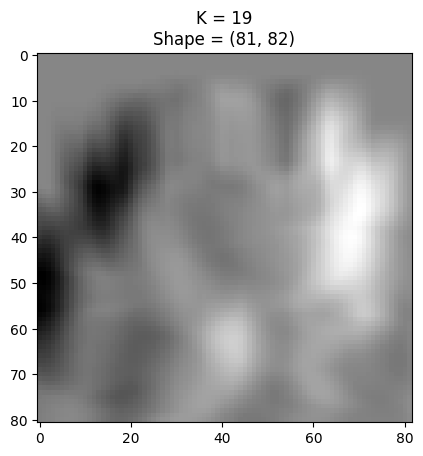

In [6]:
#@title Effect of Kernel size { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
K = 19 #@param {type:"slider", min:3, max:21, step:2}
n = apply_conv(image, K)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('K = {}\nShape = {}'.format(K, str(n.shape)))
plt.show()

Thus, we conclude that output image becomes blurry with increase in kernel size as summation occurs over larger neighbourhood. Smaller kernel size is used to capture details whereas larger kernel captures bigger elements in image.

##### Effect of Stride
Change the stride value with the slider. What do you observe?

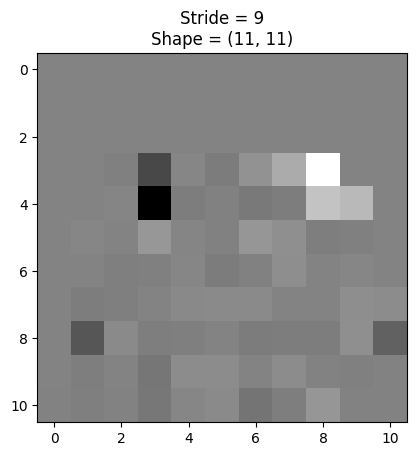

In [7]:
#@title Effect of Stride { run: "auto", vertical-output: true, display-mode: "both" }
# Our original lotus image
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
stride = 9 #@param {type:"slider", min:1, max:10, step:1}
n = apply_conv(image, 3, stride=stride)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('Stride = {}\nShape = {}'.format(stride, str(n.shape)))
plt.show()

As we can see, the output becomes pixelated as strides increase because we have fewer values in the output by skipping pixels in input. Also, hence size of output decreases.

### Questions

1. Does increasing stride increase output image size?

Answer)<br>
No, increasing the stride in convolutional operations typically reduces the output image size. The stride determines the step size of the convolutional filter as it moves across the input image. A larger stride means the filter skips more pixels in each step, resulting in a smaller output size. Conversely, a smaller stride leads to a larger output size.

2. Does increasing padding increase output image size?

Answer)<br>
Yes, increasing padding in convolutional operations generally increases the output image size. Padding involves adding extra pixels around the input image, and it helps preserve spatial information, especially at the borders. With increased padding, the convolutional filter has more room to traverse the input image, preventing a reduction in spatial dimensions. As a result, the output size tends to be larger compared to the case with no or minimal padding.

## 2. Pooling
Strides, actually downsample the image but a more robust and common approach is pooling. It may be useful when we do not require finer details but important structural elements. Here, we will see an example of max pooling and average pooling on a simple 2D image matrix. Refer [nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) and [nn.AvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) for the documentation.



Max Pooling & Average Pooling

Max Pooling:
 [[9. 8.]
 [7. 9.]]

Avg Pooling:
 [[2.5625 3.    ]
 [2.5625 1.9375]]



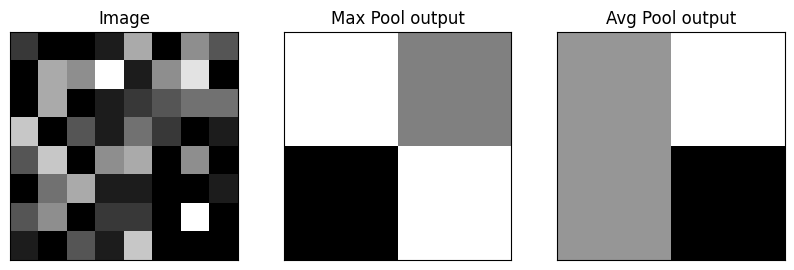

In [8]:
from torch.nn import MaxPool2d, AvgPool2d
import warnings
warnings.filterwarnings('ignore')


def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()


# 2D image
image = np.array([
   		[2, 0, 0, 1, 6, 0, 5, 3],
		[0, 6, 5, 9, 1, 5, 8, 0],
		[0, 6, 0, 1, 2, 3, 4, 4],
		[7, 0, 3, 1, 4, 2, 0, 1],
		[3, 7, 0, 5, 6, 0, 5, 0],
		[0, 4, 6, 1, 1, 0, 0, 1],
		[3, 5, 0, 2, 2, 0, 9, 0],
		[1, 0, 3, 1, 7, 0, 0, 0]])

# Saving output for plots
output = []
titles = []

output.append(image)
titles.append('Image')

image = torch.from_numpy(image.astype(np.float32))
input = image.view((1,1,image.shape[0], image.shape[1]))

#----------MAX POOLING LAYER--------
pool_layer = MaxPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
max_output_img = op.data.numpy()  # Tensor to back in numpy
max_output_img = max_output_img.reshape((-1, max_output_img.shape[-1]))
print('Max Pooling:\n', max_output_img)
print()
output.append(max_output_img)
titles.append('Max Pool output')

#----------AVERAGE POOLING LAYER--------
pool_layer = AvgPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
avg_output_img = op.data.numpy()  # Tensor to back in numpy
avg_output_img = avg_output_img.reshape((-1, avg_output_img.shape[-1]))
print('Avg Pooling:\n',avg_output_img)
print()

output.append(avg_output_img)
titles.append('Avg Pool output')

plot_images(output, titles, tick_params=False)

### Questions

1. Can you think of any other pooling other than max and avg?

Answer)<br>
In addition to max pooling and average pooling, global average pooling is another pooling operation that considers the entire feature map, computing the average value across all spatial locations.

## 3. Fine-tuning and transfer learning

Now , we will perform image classification using pretrained CNN models (transfer learning). We will understand two approaches, Fine-tuning and Feature extraction using ResNet architecture to train a model to perform traffic sign classification.

To make your task easier, we provide you the starter code to perform the lab exercises. It is expected that you should try to understand what the code does and analyze the output. We will be using Pytorch framework for the implementation of this lab. The training hyperparameters that are used in the code may not be the best to minimize training time according to lab scope.

### German Traffic Sign classification
When a task involves training a CNN on a dataset of images, our first instinct would be to train the network from scratch. However, in practice, CNN has a huge number of parameters, often in the range of millions. Training a CNN on a small dataset greatly affects the network's ability to generalize, often resulting in overfitting.
Therefore, in practice, one would fine-tune existing networks that are trained on a large dataset like the ImageNet (1.2M labeled images) by continue training it (i.e. running back-propagation) on the smaller dataset we have. Provided that our dataset is not drastically different in context to the original dataset (e.g. ImageNet), the pre-trained model will already have learned features that are relevant to our own classification problem.  Here, we will understand the Fine-tuning and Feature extraction approach to transfer learning. In the first one, we will take a pretrained ResNet model and replace the classifier to train it on our dataset. In the second approach, we will freeze the weights of the entire network except the classifier and train it on our data. We will thus, analyse the model performance in both cases. The German Traffic Sign Recognition Benchmark (GTSRB) dataset contains 43 classes of traffic signs, with varying light conditions and rich backgrounds.

In [9]:
# Import packages
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import time


In [10]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [11]:
# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

### Load German Traffic Sign dataset
To get an idea of using our own datasets with Pytorch, this time, we will not use Pytorch's builtin datasets. The dataset we will use has more than 50K samples. To make the scenario more realistic, the number of samples in each class is limited to 200 only. And we have also reduced the test set.

In [12]:
!gdown --id 1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x
From (redirected): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x&confirm=t&uuid=9b222638-3b5d-41ab-b06f-fe4ef6dab1e3
To: /content/german_traffic_signs_dataset.zip
100% 68.2M/68.2M [00:00<00:00, 257MB/s]


In [13]:
# Unzip
!unzip -q german_traffic_signs_dataset.zip

The dataset is stored in a folder structure where samples are separated in classwise folders. We can load the entire dataset using Pytorch's ['ImageFolder'](https://pytorch.org/vision/stable/datasets.html#ImageFolder) class. Then, we can see it like any built-in dataset. As the images are of varying shape, we will resize them to fixed dimensions (224,224) and normalize them in range [0,1]. We will here use data augmentation techniques like Gaussian blur and affine transformation to augment the data. This will increase variations in our data and help our model to generalize well.

In [16]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.GaussianBlur(3),
            transforms.RandomAffine(0, translate=(0.3,0.3), shear=5),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder('german_traffic_signs_dataset/Train', transform=transform)
testset = ImageFolder('german_traffic_signs_dataset/Test', transform=transform)

#### Train, validation and test dataloaders
We will split the trainset further to create train-validation split. We will only train on train data and evaluate the model on validation data at each step. The validation metrics helps us to understand whether model is overfitting the data or not.

In [17]:
# Shuffle and split train set into 80% training and 20% validation set
val_split = 0.2
indices = np.arange(len(trainset))
np.random.shuffle(indices)
partition = int((1-val_split)*len(trainset))

#SubsetRandomSampler will only sample examples from the given subset of data
train_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[:partition]), batch_size=64, num_workers=2)
val_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[partition:]), batch_size=64, num_workers=2)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': partition, 'val': len(train_loader.dataset) - partition}

test_loader = DataLoader(testset, shuffle=False, batch_size=64, num_workers=2)

In [18]:
# Print dataset information
print('Number of training images: ', dataset_sizes['train'])
print('Number of validation images: ', dataset_sizes['val'])
print('Number of test images: ', len(test_loader.dataset))
print('Number of classes: ', len(trainset.classes))

Number of training images:  6880
Number of validation images:  1720
Number of test images:  2000
Number of classes:  43


Helper functions for training/testing

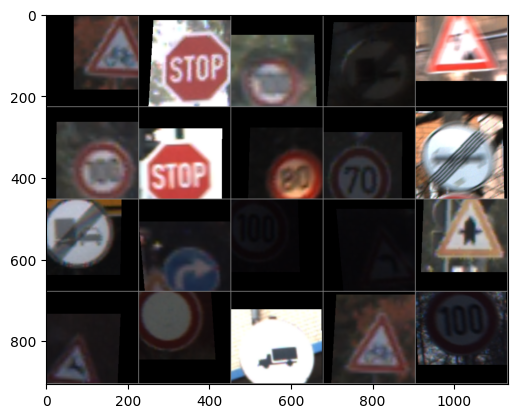

In [19]:
# Helper function to show an image
def plot_image(img):
    img = img / 2 + 0.5                         # unnormalize the image
    npimg = img.numpy()                         # torch to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # as torch image is (C, H, W)
    plt.show()

# Get some random training images from dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot images
plot_image(torchvision.utils.make_grid(images[:20], nrow=5))


In [20]:
def train_model(model, criterion, optimizer, dataloaders, num_epochs=10):
    since = time.time()

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses = []
    train_acc = []
    val_losses = []
    val_acc = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Enable grads if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Running loss and correct predictions
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Save loss and acc values
            if phase == 'train':
              train_losses.append(epoch_loss)
              train_acc.append(epoch_acc)
            else:
              val_losses.append(epoch_loss)
              val_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc*100))

            # Save the best validation accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc*100))

    return train_losses, val_losses, train_acc, val_acc

In [21]:
def test_model(model, test_loader):
    model.eval()
    test_acc = 0
    correct = 0
    for i, (images, labels) in enumerate(test_loader):
      with torch.no_grad():
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, preds = torch.max(output, dim=1)
        correct += (preds == labels).sum()

    test_acc = correct / len(test_loader.dataset)
    print('Test Accuracy: {:.4f}'.format(test_acc*100))


### 1. Finetuning
Here, we will load a pretrained model ResNet18 available in Pytorch and reset final fully connected layer. The model is trained on ImageNet dataset which is a large dataset containing 1000 classes.

In [22]:
# Load pretrained model
model = torchvision.models.resnet18(pretrained=True)

# Reset classifier to 43 output units (number of classes in our dataset)
model.fc = nn.Linear(model.fc.in_features, 43)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 144MB/s]


#### Define loss function

In [23]:
# Cross Entropy loss for multi-class classification
criterion = nn.CrossEntropyLoss()

#### Define optimizer

In [24]:
# SGD optimizer with momentum
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#### Training

In [25]:
# Accuracy on test data before training
test_model(model, test_loader)

Test Accuracy: 2.6500


In [26]:
history = train_model(model, criterion, optimizer, dataloaders, num_epochs=6)

Epoch 0/5
----------
train Loss: 2.8540 Acc: 35.6541
val Loss: 1.7035 Acc: 71.4535

Epoch 1/5
----------
train Loss: 1.1203 Acc: 84.4913
val Loss: 0.6310 Acc: 92.5581

Epoch 2/5
----------
train Loss: 0.4479 Acc: 96.3372
val Loss: 0.2632 Acc: 98.6047

Epoch 3/5
----------
train Loss: 0.2161 Acc: 98.8227
val Loss: 0.1411 Acc: 99.0698

Epoch 4/5
----------
train Loss: 0.1259 Acc: 99.4767
val Loss: 0.0890 Acc: 99.5930

Epoch 5/5
----------
train Loss: 0.0854 Acc: 99.6948
val Loss: 0.0615 Acc: 99.8256

Training complete in 4m 41s
Best val Acc: 99.825581


Plot training plots

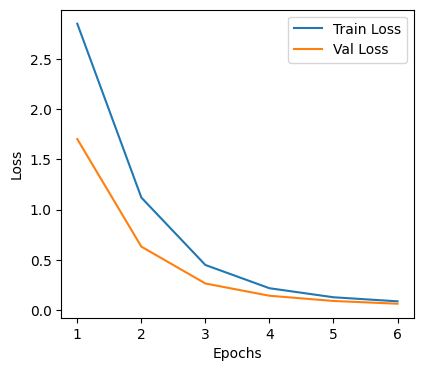

In [27]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

#### Evaluate model

In [28]:
# Accuracy on test data after training
test_model(model, test_loader)

Test Accuracy: 87.9000


### 2. Feature Extraction
Here, in the second approach, we will create a new instance of network and freeze entire network parameters except the final layer. We need to set ***requires_grad == False*** to freeze the parameters so that the gradients are not computed in backward()

In [29]:
# Load pretrained model
model_conv = torchvision.models.resnet18(pretrained=True)

# Freeze all parameters
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of new classifier have requires_grad=True by default
# so grads will be computed for classifier only
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 43)

model_conv = model_conv.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.01, momentum=0.9)

In [30]:
# Evaluate model on test data before training
print('Before training')
test_model(model_conv, test_loader)

Before training
Test Accuracy: 3.4500


####Training

In [31]:
history = train_model(model_conv, criterion, optimizer_conv, dataloaders, num_epochs=5)

Epoch 0/4
----------
train Loss: 2.3183 Acc: 41.1047
val Loss: 1.3822 Acc: 65.1744

Epoch 1/4
----------
train Loss: 1.1696 Acc: 70.0436
val Loss: 0.9958 Acc: 73.7209

Epoch 2/4
----------
train Loss: 0.8807 Acc: 77.0203
val Loss: 0.8207 Acc: 79.3023

Epoch 3/4
----------
train Loss: 0.7415 Acc: 81.2791
val Loss: 0.7174 Acc: 80.1744

Epoch 4/4
----------
train Loss: 0.6499 Acc: 83.6192
val Loss: 0.6370 Acc: 83.1395

Training complete in 3m 29s
Best val Acc: 83.139535


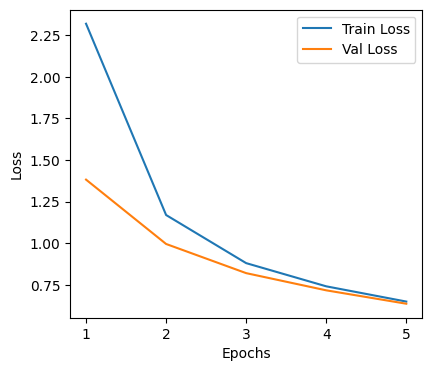

In [32]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

#### Evaluate model

In [33]:
# Accuracy on test data after training
test_model(model_conv, test_loader)

Test Accuracy: 45.9500


As you can see, the test accuracy for feature extraction approach is not good compared to the first approach, although we are using pretrained models in both cases. Also, note that the training time was reduced to about half this time. This is obvious as we are not computing all the gradients this time. Experiment with the hyper-parameters like learning rate, epochs, and also optimizers till model convergence.Did you observe any improvement in the performance?

### Exercises

Q 1: Why do you think the network did not achieve good test accuracy in the feature extraction approach?

Answer:
The network may not have achieved good test accuracy in the feature extraction approach for several reasons:

1. **Overfitting:** The model might have overfitted the training data, capturing noise or specific patterns that do not generalize well to unseen data.

2. **Insufficient Data:** If the dataset used for training is small or not representative of the overall variability in the target task, the model may struggle to generalize.

3. **Complexity of Task:** The task itself might be inherently complex, and the chosen architecture or approach may not be suitable for capturing the required features.

4. **Hyperparameter Tuning:** The model's hyperparameters, such as learning rate, batch size, or the number of layers, might not be tuned effectively.

5. **Data Preprocessing:** Inadequate preprocessing, such as normalization or handling missing values, could affect the model's performance.

6. **Architecture Choice:** The chosen neural network architecture might not be well-suited for the specific features required by the task.

7. **Training Duration:** Insufficient training time or too many training epochs could lead to underfitting or overfitting.

8. **Lack of Regularization:** The absence of techniques like dropout or L2 regularization might contribute to overfitting.

To improve test accuracy, one could explore techniques like hyperparameter tuning, data augmentation, transfer learning with a pre-trained model, or experimenting with different neural network architectures.

Q 2: Can you think of a scenario where the feature extraction approach would be preferred compared to fine tuning approach?

Answer:
Yes, there are scenarios where the feature extraction approach would be preferred over the fine-tuning approach:

1. **Limited Data:** If the target task has a limited amount of labeled data available, and fine-tuning the entire pre-trained model may lead to overfitting, feature extraction is a better choice. Extracting features from earlier layers of a pre-trained model allows leveraging the knowledge encoded in those layers while requiring fewer labeled samples for the target task.

2. **Different Domains:** When the pre-trained model is trained on a dataset from a domain similar to the target task but not identical (e.g., ImageNet pre-trained model for general image recognition tasks), feature extraction is preferred. Fine-tuning might not be effective in cases where the pre-training and target domains are significantly different.

3. **Computational Resources:** Fine-tuning a large pre-trained model on a massive dataset can be computationally expensive and time-consuming. Feature extraction is computationally more efficient, as it involves training only a relatively small classifier on top of the pre-trained features.

4. **Pre-trained Models with Specialized Features:** If the pre-trained model is known to have learned specific features relevant to the target task (e.g., texture, edges, shapes), feature extraction allows leveraging these specialized features without the risk of modifying them during fine-tuning.

5. **Interpretability:** Feature extraction provides a more interpretable representation of the data, as the extracted features are directly derived from the pre-trained model's intermediate layers. This can be beneficial in scenarios where interpretability is crucial.

6. **Stable Representations:** If the pre-trained model has learned stable and generic representations that are useful across various tasks, feature extraction can be advantageous. Fine-tuning might lead to task-specific adaptations that are not always desirable.

In summary, the choice between feature extraction and fine-tuning depends on factors such as data availability, domain similarity, computational resources, interpretability requirements, and the nature of the pre-trained model.

Q 3: Replace the ResNet18 architecture with some other pretrained model in pytorch and try to find the optimal parameters. Report the architecture and the final model performance.

Answer:
Certainly! To replace the ResNet18 architecture with another pretrained model in PyTorch, you can choose a different model from the torchvision library. Let's use the VGG16 model as an example. Additionally, we will experiment with the learning rate, optimizer, and other hyperparameters to find the optimal configuration.

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 75.7MB/s]


Before training
Test Accuracy: 2.9500
Epoch 0/4
----------
train Loss: 1.9543 Acc: 45.7122
val Loss: 1.2843 Acc: 64.4767

Epoch 1/4
----------
train Loss: 1.1630 Acc: 65.6977
val Loss: 0.9772 Acc: 73.4302

Epoch 2/4
----------
train Loss: 0.9756 Acc: 70.5814
val Loss: 0.8407 Acc: 78.0233

Epoch 3/4
----------
train Loss: 0.8730 Acc: 73.7936
val Loss: 0.7009 Acc: 81.6860

Epoch 4/4
----------
train Loss: 0.8123 Acc: 75.2907
val Loss: 0.6286 Acc: 82.5581

Training complete in 4m 26s
Best val Acc: 82.558140
After training
Test Accuracy: 44.2000


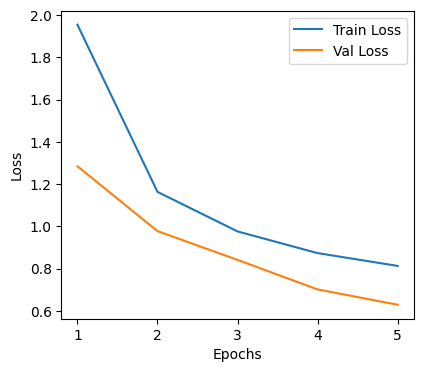

In [34]:
# Load pretrained VGG16 model
model_vgg = torchvision.models.vgg16(pretrained=True)

# Freeze all parameters except the final layer
for param in model_vgg.parameters():
    param.requires_grad = False

# Replace the final layer for 43 output units
num_ftrs_vgg = model_vgg.classifier[6].in_features
model_vgg.classifier[6] = nn.Linear(num_ftrs_vgg, 43)

model_vgg = model_vgg.to(device)

# Loss function
criterion_vgg = nn.CrossEntropyLoss()

# Experiment with different optimizer and learning rate
optimizer_vgg = optim.Adam(model_vgg.classifier[6].parameters(), lr=0.001)

# Evaluate model on test data before training
print('Before training')
test_model(model_vgg, test_loader)

# Training
history_vgg = train_model(model_vgg, criterion_vgg, optimizer_vgg, dataloaders, num_epochs=5)

# Plot training plots
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history_vgg[0])+1),history_vgg[0])
ax.plot(np.arange(1,len(history_vgg[1])+1),history_vgg[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

# Evaluate model on test data after training
print('After training')
test_model(model_vgg, test_loader)


Q 4: Which other data augmentations can we used to augment the data?

Answer:
In addition to the common data augmentations like resizing, cropping, and flipping, there are several other techniques you can use to augment data in the context of computer vision tasks. Here are some additional data augmentations:

1. **Rotation:**
   - Rotate the image by a certain angle to introduce variations.

2. **Shear:**
   - Apply shearing transformations to distort the image.

3. **Zoom:**
   - Zoom in or out of the image to simulate different perspectives.

4. **Brightness and Contrast Adjustment:**
   - Adjust the brightness and contrast of the image.

5. **Color Jittering:**
   - Introduce random changes to the color of the image.

6. **Gaussian Blur:**
   - Apply a Gaussian blur to smooth the image.

7. **Random Erasing:**
   - Randomly erase a portion of the image to simulate occlusions.

8. **Cutout:**
   - Cut out a square region from the image and replace it with a constant value.

9. **Grid Distortion:**
   - Distort the image by moving grid points.

10. **Elastic Transformations:**
    - Apply elastic deformations to simulate local distortions.

11. **Noise Injection:**
    - Add random noise to the image.

12. **Random Patching:**
    - Replace a part of the image with a randomly selected patch.

When implementing data augmentations, it's important to consider the nature of your dataset and the specific characteristics of your task. Not all augmentations may be suitable for every dataset or problem. Additionally, validation and testing should be done to ensure that the augmented data enhances the model's generalization rather than introducing noise.

## References and Additional Resources:

*   [Transfer Learning Pytorch tutorial](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html#id1)
*   [Transfer Learning with Convolutional Neural Networks in PyTorch](https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce)
*    [Torchvision models](https://pytorch.org/vision/stable/models.html)
*    [A Comprehensive Hands-on Guide to Transfer Learning with Real-World Applications in Deep Learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

